In [36]:
import pandas as pd
df = pd.read_csv("../Data/flight/train.csv")
print(df.head())
print(df.columns)

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [15]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [30]:
df['Gender'],  gender_index = pd.factorize(df['Gender'])
df['Customer Type'],  customer_type_index = pd.factorize(df['Customer Type'])
df['Type of Travel'],  type_of_Travel_index = pd.factorize(df['Type of Travel'])
df['Class'],  class_index = pd.factorize(df['Class'])


In [37]:
gender_set = set(df['Gender'])
gender_Dic = {k:v for v, k in enumerate(gender_set)}
df['Gender'].replace(gender_Dic, inplace=True)
customer_type_set = set(df['Customer Type'])
customer_type_Dic = {k:v for v, k in enumerate(customer_type_set)}
df['Customer Type'].replace(customer_type_Dic, inplace=True)
type_of_Travel_set = set(df['Type of Travel'])
type_of_Travel_Dic = {k:v for v, k in enumerate(type_of_Travel_set)}
df['Type of Travel'].replace(type_of_Travel_Dic, inplace=True)
class_set = set(df['Class'])
class_Dic = {k:v for v, k in enumerate(class_set)}
df['Class'].replace(class_Dic, inplace=True)

## Decision Tree Classifier


In [46]:
from sklearn import tree

Y = df['satisfaction']
X = df.drop(['Unnamed: 0','id', 'satisfaction'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2,min_samples_leaf=2,random_state=0)
clf = clf.fit(X, Y)

The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function. 

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.300513 to fit



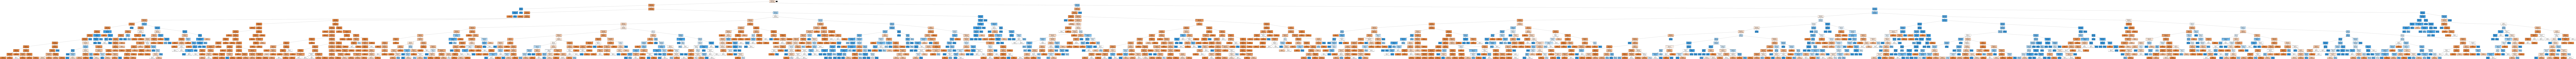

In [32]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['neutral or dissatisfied', 'satisfied'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Next, suppose we apply the decision tree to classify the following test examples.

In [39]:
testData = pd.read_csv("../Data/flight/test.csv")

In [33]:
testData['Gender'],  gender_index = pd.factorize(testData['Gender'])
testData['Customer Type'],  customer_type_index = pd.factorize(testData['Customer Type'])
testData['Type of Travel'],  type_of_Travel_index = pd.factorize(testData['Type of Travel'])
testData['Class'],  class_index = pd.factorize(testData['Class'])


In [40]:
gender_set = set(testData['Gender'])
gender_Dic = {k:v for v, k in enumerate(gender_set)}
testData['Gender'].replace(gender_Dic, inplace=True)
customer_type_set = set(testData['Customer Type'])
customer_type_Dic = {k:v for v, k in enumerate(customer_type_set)}
testData['Customer Type'].replace(customer_type_Dic, inplace=True)
type_of_Travel_set = set(testData['Type of Travel'])
type_of_Travel_Dic = {k:v for v, k in enumerate(type_of_Travel_set)}
testData['Type of Travel'].replace(type_of_Travel_Dic, inplace=True)
class_set = set(testData['Class'])
class_Dic = {k:v for v, k in enumerate(class_set)}
testData['Class'].replace(class_Dic, inplace=True)

We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [47]:
testY = testData['satisfaction']
testX = testData.drop(['Unnamed: 0','id', 'satisfaction'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['satisfaction'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

satisfaction          Predicted Class
0                    satisfied  neutral or dissatisfied
1                    satisfied  neutral or dissatisfied
2      neutral or dissatisfied  neutral or dissatisfied
3                    satisfied  neutral or dissatisfied
4                    satisfied  neutral or dissatisfied
...                        ...                      ...
25971  neutral or dissatisfied  neutral or dissatisfied
25972                satisfied                satisfied
25973  neutral or dissatisfied  neutral or dissatisfied
25974                satisfied                satisfied
25975  neutral or dissatisfied  neutral or dissatisfied

[25976 rows x 2 columns]

Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

In [48]:
from sklearn.metrics import accuracy_score
print(f"{testY.values} is type {type(testY)}")
print(f"{predY} is type {type(predY)}")

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

['satisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'] is type <class 'pandas.core.series.Series'>
['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' ... 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied'] is type <class 'numpy.ndarray'>
Accuracy on test data is 0.88
